In [1]:
from trainer import Trainer

# The trainer will only write the results to file every time 200 battlesnake games has been played and fitted
# A much larger amount of games must be played for the snakes to play somewhat well, but 200 is the minimum
# to show that it works
# Note: the trainer will warm up for 100 games to ensure there is a minimum amount of games in the replay memory to minimize training on the same games over and over. Perhaps it should be higher

# Uncomment these lines to run the trainer here. Note that you won't be able to see the stats in the next cell before it's done
# Run run.py to be able to update the stats as it goes
# trainer = Trainer()
# trainer.train(2000)

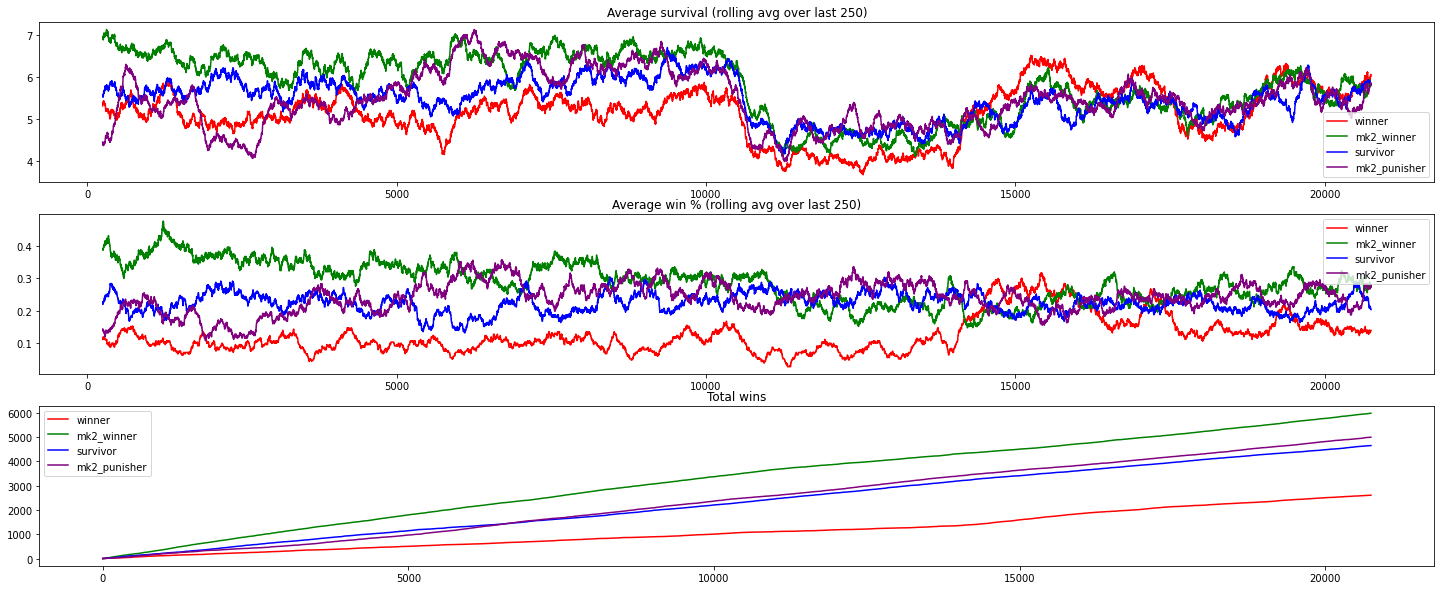

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

snakes = ["winner", "mk2_winner", "survivor", "mk2_punisher"]
colors = ["red", "green", "blue", "purple"]

average_over = 1000

total_wins = dict()
avg_win = dict()
survival = dict()
snake_dfs = dict()
for snake_no, snake in enumerate(snakes):
    snake_history = list()

    df = pd.read_csv(f"./logs/{snake}.csv")
    snake_dfs[snake] = df

    df["total_wins"] = df.won.astype(int).cumsum()
    df["avg_win"] = df.won.astype(int).rolling(average_over).sum() / average_over
    df["avg_survival"] = df.survived.rolling(average_over).sum() / average_over

fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=(25, 10))

for snake_no, snake in enumerate(snakes):
    snake_dfs[snake]["total_wins"].plot(ax=axs3, label=snake, color=colors[snake_no])
axs3.title.set_text("Total wins")
axs3.legend()

for snake_no, snake in enumerate(snakes):
    snake_dfs[snake]["avg_win"].plot(ax=axs2, label=snake, color=colors[snake_no])
axs2.title.set_text(f"Average win % (rolling avg over last {average_over})")
axs2.legend()

for snake_no, snake in enumerate(snakes):
    snake_dfs[snake]["avg_survival"].plot(ax=axs1, label=snake, color=colors[snake_no])
axs1.title.set_text(f"Average survival (rolling avg over last {average_over})")
axs1.legend()
plt.show()

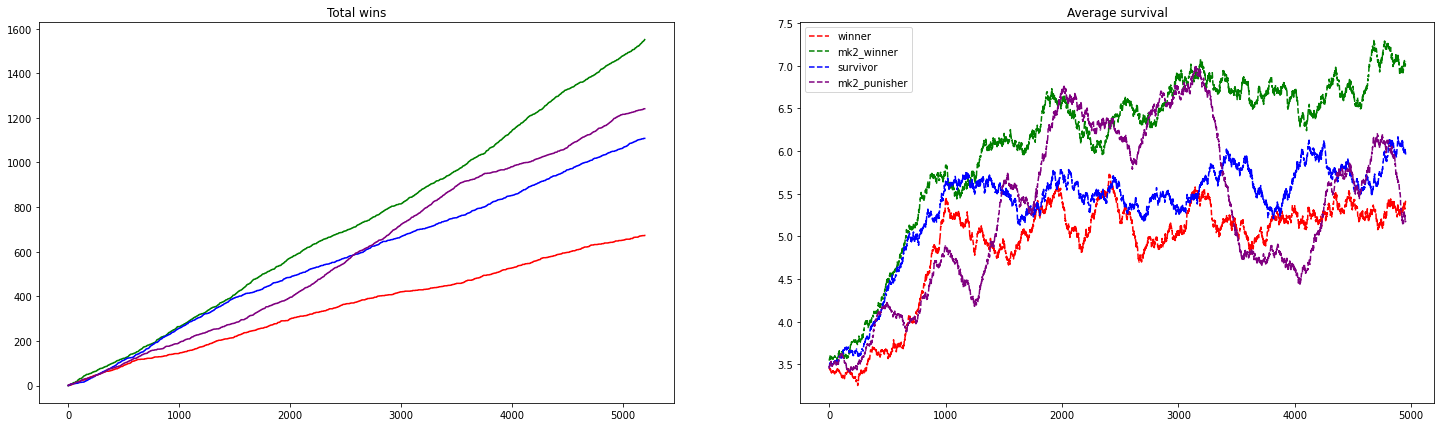

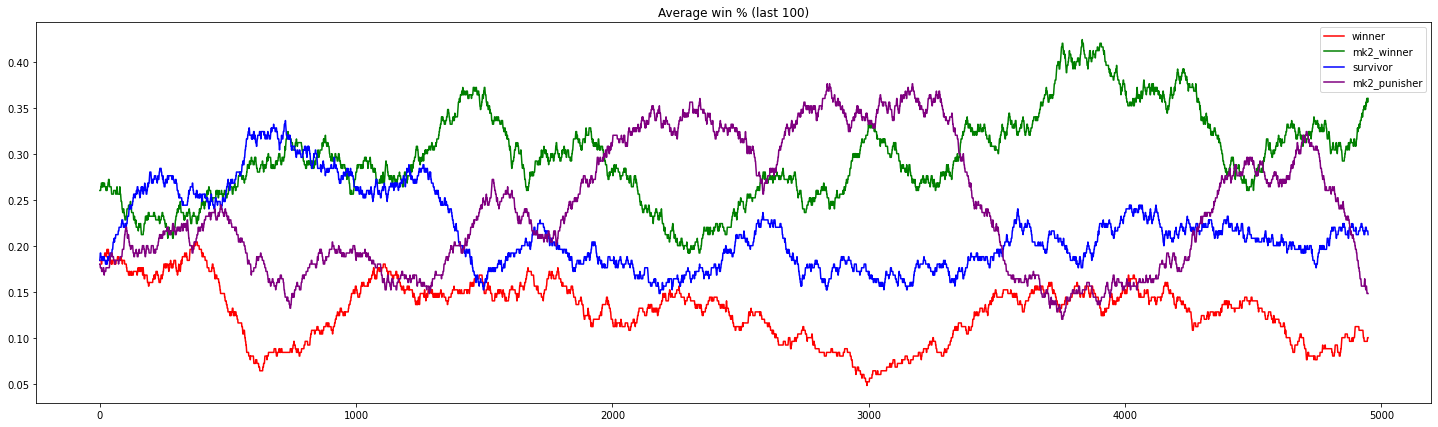

In [19]:
# !
# This is the old logging, which uses json files which won't exist in the current version of the trainer
# !

import json

import matplotlib.pyplot as plt
import pandas as pd

snakes = ["winner", "mk2_winner", "survivor", "mk2_punisher"]
colors = ["red", "green", "blue", "purple"]

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(25, 7))
history_dict = dict()
avg_win_dict = dict()
survival_dict = dict()
avg_over = 250
for snake_no, snake in enumerate(snakes):
    snake_history = list()

    with open(f"./models/{snake}-history.json") as json_file:
        snake_history_json = json.load(json_file)
        snake_history = [*snake_history, *snake_history_json]
        accumulated_history = list()
        avg_win_history = list()
        for index in range(0, len(snake_history)):
            accumulated_history.append(sum(snake_history[0:index]))
            if index > avg_over:
                avg_win_history.append(sum(snake_history[index-avg_over:index]) / avg_over)
        history_dict[snake] = accumulated_history
        avg_win_dict[snake] = avg_win_history

    survival_history = list()
    with open(f"./models/{snake}-surival-history.json") as json_file:
        survival_history_json = json.load(json_file)
        survival_history = [*survival_history, *survival_history_json]
        avg_history = list()
        for end in range(avg_over, len(survival_history)):
            avg_history.append(sum(survival_history[end-avg_over:end]) / avg_over)
        survival_dict[snake] = avg_history

    axs1.title.set_text("Total wins")
    axs2.title.set_text("Average survival")
    axs1.plot(history_dict[snake], label=snake, color=colors[snake_no])
    axs2.plot(survival_dict[snake], label=snake, linestyle="dashed", color=colors[snake_no])

plt.legend()
plt.show()

plt.figure(figsize=(25, 7))
plt.title("Average win % (last 100)")
for snake_no, snake in enumerate(snakes):
    plt.plot(avg_win_dict[snake], label=snake, color=colors[snake_no])
plt.legend()
plt.show()